In [1]:
import numpy as np
import time
import os
from datetime import datetime

In [2]:
data = !curl https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html
data = np.array(data)

In [3]:
Ingham_Start = 0
for num, item in enumerate(data):
    if "Ingham" in item:
        print(item, num)
        Ingham_Start = num
        break
Ingham_Data = data[Ingham_Start:Ingham_Start+5]
Ingham_Population = 292406
Niowave_Reporting_Employees = 65

Cases_Total = int(Ingham_Data[1].split('">')[1].strip("</td>"))
Deaths_Total = int(Ingham_Data[2].split('">')[1].strip("</td>"))
print(Cases_Total, Deaths_Total)

IndexError: list index out of range

In [3]:
def One_Case_Prob(Cases_In_Pop, Population, N):
    """
    This is a function that calculates the probability that AT LEAST one person has gotten sick given the cases in the local population,
        the size of that population, and the number of people in the sample size.
        
    This is currently being used along with Ingham county and State of Michigan health data to calculate the odds that a reporting employee
        to Niowave, Inc. has had or currently has COVID. This function uses basic statistics to determine these probabilites.
        
    Flow:
    Probability of one being sick (P_sick)= Total_Cases_In_Region/Region_Population
    Probability of one not being sick P_Healthy= 1 - P_sick
    Probability one fails = 1 - (P_Healthy)^N
    """
    P_has = Cases_In_Pop/Population
    P_not = 1-P_has
    return 1-P_not**(N)

Cases = 1192
Pop = 292406
Employees = 66

One_Case_Prob(Cases,Pop, Employees)

0.23631544188635867

In [ ]:
def One_Case_Prob(Cases_In_Pop, Population, N):
    """
    Probability of one being sick (P_sick)= Total_Cases_In_Region/Region_Population
    Probability of one not being sick P_Healthy= 1 - P_sick
    Probability one fails = 1 - (P_Healthy)^N
    """
    P_has = Cases_In_Pop/Population
    P_not = 1-P_has
    return 1-P_not**(N)

Cases_Percent_of_Pop = Cases_Total/Ingham_Population
Deaths_Percent_of_Pop = Deaths_Total/Ingham_Population
Cases_Per_Resident = int(1/Cases_Percent_of_Pop)
Deaths_Per_Resident = round(1/Deaths_Percent_of_Pop,3)

today = datetime.today().strftime('%m/%d/%Y')
print("Ingham County Coronavirus Data for {}\n".format(today) + \
      "-"*60 + "\n" + \
      "Total Cases = {}\n".format(Cases_Total) + \
      "Total Deaths = {}\n".format(Deaths_Total) + \
      "Percent of Ingham with COVID = {:.3f}%\n".format(Cases_Percent_of_Pop*100) + \
      "Percent of Ingham deceased from COVID = {:.3f}%\n".format(Deaths_Percent_of_Pop*100) + \
      "Residents per case from COVID = {}\n".format(Cases_Per_Resident) + \
      "Residents per death from COVID = {}\n".format(Deaths_Per_Resident) + \
      "Percent chance at least one employee has COVID = {:.3f}%".format(100*One_Case_Prob(Cases_Total, Ingham_Population, Niowave_Reporting_Employees)))

In [ ]:
with open("Ingham_COVID_Data.txt",'a') as file:
    file.write("Ingham County Coronavirus Data for {}\n".format(today) + \
      "-"*60 + "\n" + \
      "Total Cases = {}\n".format(Cases_Total) + \
      "Total Deaths = {}\n".format(Deaths_Total) + \
      "Percent of Ingham with COVID = {:.3f}%\n".format(Cases_Percent_of_Pop*100) + \
      "Percent of Ingham deceased from COVID = {:.3f}%\n".format(Deaths_Percent_of_Pop*100) + \
      "Residents per case from COVID = {}\n".format(Cases_Per_Resident) + \
      "Residents per death from COVID = {}\n".format(Deaths_Per_Resident) + \
      "Percent chance at least one employee has COVID = {:.3f}%\n".format(100*One_Case_Prob(Cases_Total, Ingham_Population, Niowave_Reporting_Employees)) + \
      "-"*60 + "\n" + "-"*60 + '\n')

In [ ]:
Kalamazoo_Start = 0
for num, item in enumerate(data):
    if "Kalamazoo" in item:
        print(item, num)
        Kalamazoo_Start = num
Kalamazoo_Data = data[Kalamazoo_Start:Kalamazoo_Start+5]
Kalamazoo_Population = 265066

Kzoo_Cases_Total = int(Kalamazoo_Data[1].split('">')[1].strip("</td>"))
Kzoo_Deaths_Total = int(Kalamazoo_Data[2].split('">')[1].strip("</td>"))
print(Kzoo_Cases_Total, Kzoo_Deaths_Total)

#Hello world there is no problem in this code I am just living my life to the fullest. You know how it goes. Just commenting and living.
# Here you can see the cases and the population for Kalamazoo

Kzoo_Cases_Percent_of_Pop = Kzoo_Cases_Total/Kalamazoo_Population
Kzoo_Deaths_Percent_of_Pop = Kzoo_Deaths_Total/Kalamazoo_Population
Kzoo_Cases_Per_Resident = int(1/Kzoo_Cases_Percent_of_Pop)
Kzoo_Deaths_Per_Resident = round(1/Kzoo_Deaths_Percent_of_Pop,3)

print("Kalamazoo County Coronavirus Data for {}\n".format(today) + \
      "-"*60 + "\n" + \
      "Total Cases = {}\n".format(Kzoo_Cases_Total) + \
      "Total Deaths = {}\n".format(Kzoo_Deaths_Total) + \
      "Percent of Kalamazoo with COVID = {:.3f}%\n".format(Kzoo_Cases_Percent_of_Pop*100) + \
      "Percent of Kalamazoo deceased from COVID = {:.3f}%\n".format(Kzoo_Deaths_Percent_of_Pop*100) + \
      "Residents per case from COVID = {}\n".format(Kzoo_Cases_Per_Resident) + \
      "Residents per death from COVID = {}\n".format(Kzoo_Deaths_Per_Resident))

with open("Kalamazoo_COVID_Data.txt",'a') as file:
    file.write("Kalamazoo County Coronavirus Data for {}\n".format(today) + \
      "-"*60 + "\n" + \
      "Total Cases = {}\n".format(Kzoo_Cases_Total) + \
      "Total Deaths = {}\n".format(Kzoo_Deaths_Total) + \
      "Percent of Kalamazoo with COVID = {:.3f}%\n".format(Kzoo_Cases_Percent_of_Pop*100) + \
      "Percent of Kalamazoo deceased from COVID = {:.3f}%\n".format(Kzoo_Deaths_Percent_of_Pop*100) + \
      "Residents per case from COVID = {}\n".format(Kzoo_Cases_Per_Resident) + \
      "Residents per death from COVID = {}\n".format(Kzoo_Deaths_Per_Resident) + \
      "-"*60 + "\n" + "-"*60 + '\n')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from datetime import datetime

In [8]:
data = []
for people in np.linspace(0,25000, 100):
    data.append([people, One_Case_Prob(people,Pop, Employees)])
data = np.array(data)

0.20390275129966084


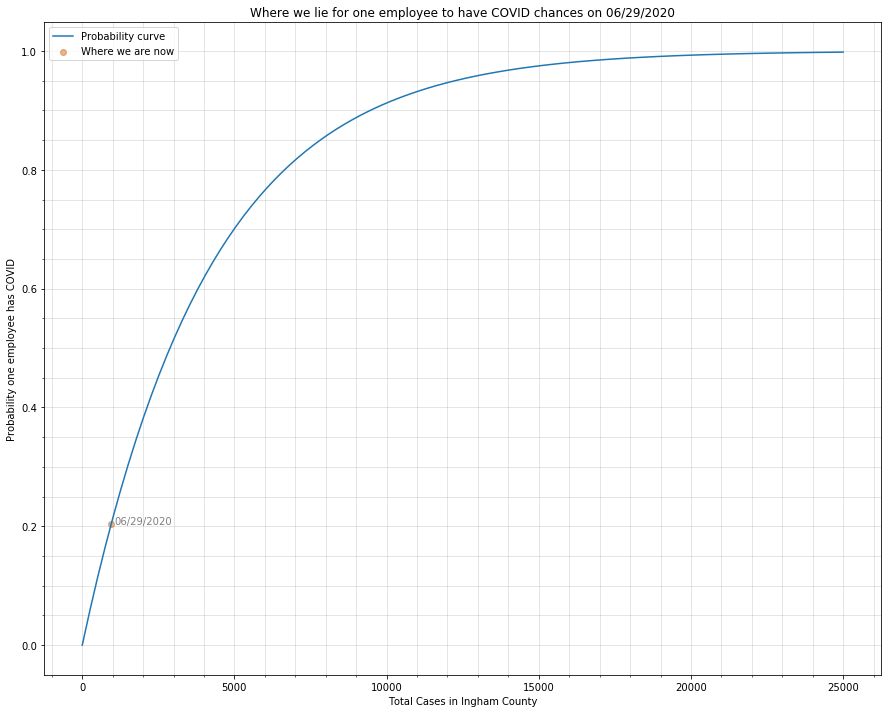

In [11]:
import matplotlib.pyplot as plt


today = datetime.today().strftime('%m/%d/%Y')
Niowave_Chances = One_Case_Prob(Cases,Pop, Employees)
print(Niowave_Chances)
plt.figure(figsize = (15,12))
plt.ylabel("Probability one employee has COVID")
plt.xlabel("Total Cases in Ingham County")
plt.title("Where we lie for one employee to have COVID chances on {}".format(today))
plt.plot(data[:,0], data[:,1], label = "Probability curve")
plt.grid(True,alpha = 0.25,which = 'both',color = 'gray') #Making a grid
plt.scatter(Cases, Niowave_Chances, \
            alpha = 0.5, color = 'chocolate', label = "Where we are now")
plt.annotate(s = "{}".format(today), xy = [Cases*1.1, Niowave_Chances], alpha = 0.5)
plt.minorticks_on() #Setting the minor ticks
plt.legend()